In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from random import randint
from PIL import Image, ImageFont, ImageDraw
import string

In [2]:
from skimage.util import random_noise
from skimage.io import imsave
from skimage.transform import resize

In [84]:
def generate_noisy_symbol(num):
    #img = cv2.imread('/home/fizzer/ros_ws/src/2022_competition/enph353/enph353_gazebo/scripts/blank_plate.png')
    #img=img[50:350,:]
    #img = img[100:250, 5:105]

    rows=150
    cols=100
    FONT_SIZE = random.randint(27,30)
    
    OVERLAY = random.randint(-150,-100)
    TB=random.randint(0,50)
    TG=random.randint(0,50)
    TR=random.randint(0,50)
    
    TX=random.randint(-10,10)
    TY=random.randint(330,340)
    
    CENTER=(random.randint(24,26),random.randint(24,26))
    AXES=(random.randint(0,10),0)
    ANGLE = random.randint(0,360)
    
    GKERNEL = random.randint(5,25)
    if GKERNEL%2==0:
        GKERNEL+=1


    s = str(num)
    parking_spot = 255 * np.ones(shape=[375, 250, 3], dtype=np.uint8)
    img = cv2.putText(parking_spot,s,(TX, TY),cv2.FONT_HERSHEY_PLAIN,FONT_SIZE,(TB, TG, TR),30,cv2.LINE_AA,)
    img = cv2.resize(img, [100,150])
    
    overlay=np.full((rows,cols,3), OVERLAY)
    img=np.clip(img+overlay,0,255).astype('uint8')
    #return img
    
    

    noise = np.zeros((rows//2,cols//2,3))
    noise = random_noise(noise,mode='gaussian',var=12312321)
    noise = resize(noise, (rows, cols))
    img=np.clip(img+(img*noise),0,255).astype('uint8')


    # randomize all these numbers for motion blur
    psf = np.zeros((50, 50, 3))
    psf = cv2.ellipse(psf, 
                  CENTER, # center
                  AXES, # axes -- 22 for blur length, 0 for thin PSF 
                  ANGLE, # angle of motion in degrees
                  0, 360, # ful ellipse, not an arc
                  (1, 1, 1), # white color
                  thickness=-1) # filled

    psf /= psf[:,:,0].sum() # normalize by sum of one channel 
                            # since channels are processed independently

    img = cv2.filter2D(img, -1, psf)

    # vary gaussian blur slightly
    img=cv2.GaussianBlur(img, (GKERNEL,GKERNEL),0)


    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img

In [94]:
img = generate_noisy_symbol(1)
cv2.imshow("win", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [95]:
def generate_data(num):

    imgs = []
    labels=[]
    NUM=num
            
    for d in range(1,9):
        print('starting digit ',d)
        for i in range(NUM):
            imgs.append(generate_noisy_symbol(d))
            labels.append(d)
            if i%10==0:
                print(i, end='\r')
        print('finished digit ',d)
            
    return imgs, labels

In [96]:
NUM=500
imgs, labels = generate_data(NUM)

starting digit  1
finished digit  1
starting digit  2
finished digit  2
starting digit  3
finished digit  3
starting digit  4
finished digit  4
starting digit  5
finished digit  5
starting digit  6
finished digit  6
starting digit  7
finished digit  7
starting digit  8
finished digit  8


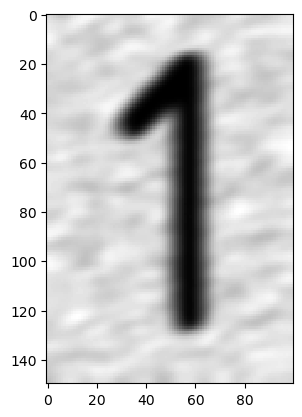

In [97]:
plt.imshow(imgs[0], cmap='gray')

In [98]:
np.save('/home/fizzer/ros_ws/src/controller_pkg/cnn_trainer/plates/pnum_imgs.npy',imgs)

In [99]:
np.save('/home/fizzer/ros_ws/src/controller_pkg/cnn_trainer/plates/pnum_labels.npy',labels)